### Amazon Stock Price Prediction
* Data is in Sequence manner.
* I was taken only Train data to predict Open Price.
* Taking the previous Open Price to predict the upcoming Open price 
* Target feature present within the dataset, taking that single feature to predict the upcoming Open     price

#### About Data
* Data has 7 columns
  * Date : selling stock price on that date
  * Open : Amazon started the stock selling with that price on that date
  * High : High price recorded on that date
  * Low  : Low price recorded on that date
  * Close:Ended the day with that stock price
  * Adj CLose : Adject Closing price on that day
  * Volume : Total Volume on whole day

### Task : To predict upcoming price based on previous date's recorded prices
 * Target : Open Price

#### import required Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (7)\AMZNtrain.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


### Checking the null values

In [4]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Type Casting 

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


### Choosing the Target feature

In [9]:
df = df[['Date','Open']]

In [10]:
df

,Date,Open
0,2014-01-02,398.799988
1,2014-01-03,398.290009
2,2014-01-06,395.850006
3,2014-01-07,395.040009
4,2014-01-08,398.470001
...,...,...
1253,2018-12-24,1346.000000
1254,2018-12-26,1368.890015
1255,2018-12-27,1454.199951
1256,2018-12-28,1473.349976


### Setting the index as Date

In [11]:
df.set_index('Date',inplace = True)

In [12]:
df

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


In [13]:
df.sort_index(inplace = True)

In [14]:
df

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


### checking the consecutive gap 

In [15]:
for i in range(1,len(df)):
    value = df.index[i]-df.index[i-1]
    if value.days > 4:
        print(df.index[i],value.days)

In [16]:
import matplotlib.pyplot as plt

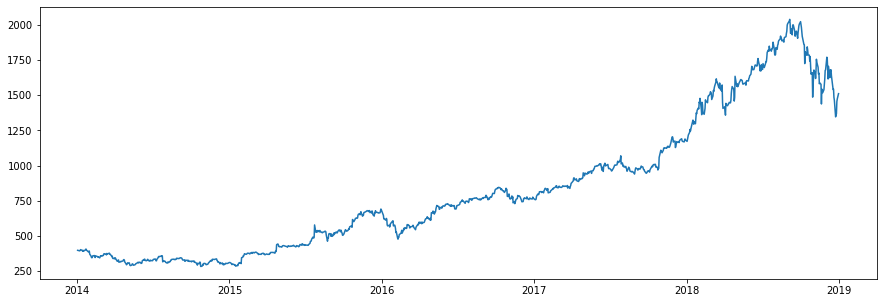

In [17]:
plt.figure(figsize=(15,5))
plt.plot(df)

In [18]:
round(len(df)*0.8)

1006

### Splitting into train and test data

In [19]:
train_data = df.iloc[0:round(len(df)*0.8)]

In [20]:
train_data

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2017-12-21,1175.900024
2017-12-22,1172.079956
2017-12-26,1168.359985


In [21]:
test_data = df.iloc[round(len(df)*0.8):]

In [22]:
test_data

,Open
Date,
2017-12-29,1182.349976
2018-01-02,1172.000000
2018-01-03,1188.300049
2018-01-04,1205.000000
2018-01-05,1217.510010
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


### Preprocessing 

In [23]:
from  sklearn.preprocessing  import MinMaxScaler   

In [24]:
sc = MinMaxScaler()

In [25]:
 train_data_num = sc.fit_transform(train_data)

In [26]:
train_data_num

array([[0.12428297],
       [0.12372894],
       [0.12107814],
       ...,
       [0.96032503],
       [0.97287288],
       [0.98274813]])

In [27]:
 test_data_num = sc.transform(test_data)

In [28]:
test_data_num

array([[0.97552361],
       [0.9642795 ],
       [0.98198771],
       [1.00013036],
       [1.01372111],
       [1.03380844],
       [1.05651401],
       [1.04374893],
       [1.05959932],
       [1.07442857],
       [1.12832435],
       [1.11663478],
       [1.09676467],
       [1.11637406],
       [1.10026295],
       [1.14471793],
       [1.184621  ],
       [1.17721188],
       [1.20329611],
       [1.22194947],
       [1.21542026],
       [1.2677082 ],
       [1.26086389],
       [1.29605207],
       [1.21482269],
       [1.17010685],
       [1.26520945],
       [1.24422046],
       [1.18317615],
       [1.17359425],
       [1.19669091],
       [1.21876629],
       [1.28464498],
       [1.27430252],
       [1.2624826 ],
       [1.30431948],
       [1.31557446],
       [1.31555271],
       [1.33061005],
       [1.34723187],
       [1.3418108 ],
       [1.3353902 ],
       [1.28704585],
       [1.31435771],
       [1.35668341],
       [1.3494264 ],
       [1.37493481],
       [1.389

In [29]:
X_train=[]
y_train=[]

In [ ]:
#### spliting the data 

In [30]:
for i in range(60,len(train_data)):
    X_train.append(train_data_num[i-60:i,:]) #Xtrain
    y_train.append(train_data_num[i,:])

In [ ]:
X_train

In [32]:
X_train = np.array(X_train)

In [33]:
X_train.shape

(946, 60, 1)

In [34]:
y_train = np.array(y_train)

In [ ]:
y_train

### build a RNN Architecture

In [36]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [37]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout

#### init the model

In [38]:
rnn_model = Sequential()

In [39]:
X_train.shape[1:]

(60, 1)

#### Add RNN layer

In [40]:
rnn_layer = LSTM(input_shape = X_train.shape[1:] , kernel_initializer = 'random_uniform',
                     recurrent_initializer= 'random_uniform',return_sequences=True,units=80)

In [41]:
rnn_model.add(rnn_layer)

In [42]:
rnn_model.add(Dropout(0.1))

#### add another layer

In [43]:
rnn_layer_1 = LSTM(kernel_initializer='random_uniform',recurrent_initializer='random_uniform',
                       return_sequences=False,units=25)

In [44]:
rnn_model.add(rnn_layer_1)

In [45]:
rnn_model.add(Dropout(0.1))

#### add O/p layer

In [46]:
output_layer = Dense(activation='relu',kernel_initializer='random_uniform',units=1)

In [47]:
rnn_model.add(output_layer)

In [48]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 80)            26240     
                                                                 
 dropout (Dropout)           (None, 60, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                10600     
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 36,866
Trainable params: 36,866
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [49]:
rnn_model.compile(loss='mse',optimizer='adam',metrics='mse')

In [50]:
rnn_model.fit(X_train,y_train,epochs=15,batch_size=32)

Epoch 1/15
30/30 [==============================] - 20s 187ms/step - loss: 0.1163 - mse: 0.1163
Epoch 2/15
30/30 [==============================] - 6s 211ms/step - loss: 0.0072 - mse: 0.0072
Epoch 3/15
30/30 [==============================] - 5s 181ms/step - loss: 0.0035 - mse: 0.0035
Epoch 4/15
30/30 [==============================] - 6s 182ms/step - loss: 0.0032 - mse: 0.0032
Epoch 5/15
30/30 [==============================] - 6s 210ms/step - loss: 0.0029 - mse: 0.0029
Epoch 6/15
30/30 [==============================] - 6s 192ms/step - loss: 0.0028 - mse: 0.0028
Epoch 7/15
30/30 [==============================] - 4s 150ms/step - loss: 0.0026 - mse: 0.0026
Epoch 8/15
30/30 [==============================] - 4s 139ms/step - loss: 0.0026 - mse: 0.0026
Epoch 9/15
30/30 [==============================] - 5s 173ms/step - loss: 0.0028 - mse: 0.0028
Epoch 10/15
30/30 [==============================] - 6s 186ms/step - loss: 0.0021 - mse: 0.0021
Epoch 11/15
30/30 [=============================

In [51]:
len(train_data_num)

1006

#### adding the previous 60 recordes on test because not missing the sequence 

In [52]:
train_data_num[len(train_data_num)-60:]

array([[0.72767471],
       [0.74482878],
       [0.75095604],
       [0.77007647],
       [0.77380278],
       [0.76793631],
       [0.77395489],
       [0.7850252 ],
       [0.7865896 ],
       [0.78349342],
       [0.78749133],
       [0.76655658],
       [0.77039156],
       [0.76300406],
       [0.74374239],
       [0.7535199 ],
       [0.75605121],
       [0.84058319],
       [0.88063837],
       [0.89583695],
       [0.89192597],
       [0.88368031],
       [0.87644492],
       [0.89599993],
       [0.91293671],
       [0.9108508 ],
       [0.91426208],
       [0.91441419],
       [0.91104641],
       [0.91877062],
       [0.91540284],
       [0.91882499],
       [0.92764647],
       [0.91840129],
       [0.92175819],
       [0.93060142],
       [0.95200324],
       [0.99758825],
       [1.        ],
       [0.98904924],
       [0.95895617],
       [0.96433387],
       [0.9662893 ],
       [0.91676083],
       [0.92733138],
       [0.9475382 ],
       [0.9625413 ],
       [0.956

In [53]:
dataset_array = np.concatenate([train_data_num[len(train_data_num)-60:],test_data_num],axis =0)

In [54]:
dataset_array

array([[0.72767471],
       [0.74482878],
       [0.75095604],
       [0.77007647],
       [0.77380278],
       [0.76793631],
       [0.77395489],
       [0.7850252 ],
       [0.7865896 ],
       [0.78349342],
       [0.78749133],
       [0.76655658],
       [0.77039156],
       [0.76300406],
       [0.74374239],
       [0.7535199 ],
       [0.75605121],
       [0.84058319],
       [0.88063837],
       [0.89583695],
       [0.89192597],
       [0.88368031],
       [0.87644492],
       [0.89599993],
       [0.91293671],
       [0.9108508 ],
       [0.91426208],
       [0.91441419],
       [0.91104641],
       [0.91877062],
       [0.91540284],
       [0.91882499],
       [0.92764647],
       [0.91840129],
       [0.92175819],
       [0.93060142],
       [0.95200324],
       [0.99758825],
       [1.        ],
       [0.98904924],
       [0.95895617],
       [0.96433387],
       [0.9662893 ],
       [0.91676083],
       [0.92733138],
       [0.9475382 ],
       [0.9625413 ],
       [0.956

In [55]:
x_test = []
y_test = []

In [56]:
for i in range(60,len(dataset_array)):
    x_test.append(dataset_array[i-60:i,:])
    y_test.append(dataset_array[i,:])

In [ ]:
x_test

In [58]:
x_test=np.array(x_test)

In [59]:
y_test=np.array(y_test)

In [60]:
x_test

array([[[0.72767471],
        [0.74482878],
        [0.75095604],
        ...,
        [0.96032503],
        [0.97287288],
        [0.98274813]],

       [[0.74482878],
        [0.75095604],
        [0.77007647],
        ...,
        [0.97287288],
        [0.98274813],
        [0.97552361]],

       [[0.75095604],
        [0.77007647],
        [0.77380278],
        ...,
        [0.98274813],
        [0.97552361],
        [0.9642795 ]],

       ...,

       [[1.88769987],
        [1.8637993 ],
        [1.84392919],
        ...,
        [1.28258081],
        [1.15331131],
        [1.17817879]],

       [[1.8637993 ],
        [1.84392919],
        [1.8084043 ],
        ...,
        [1.15331131],
        [1.17817879],
        [1.27085862]],

       [[1.84392919],
        [1.8084043 ],
        [1.77471534],
        ...,
        [1.17817879],
        [1.27085862],
        [1.29166301]]])

In [61]:
y_pred = rnn_model.predict(x_test)

8/8 [==============================] - 4s 38ms/step


In [62]:
y_pred

array([[0.94903   ],
       [0.95021623],
       [0.95098126],
       [0.95207876],
       [0.95373887],
       [0.95595616],
       [0.95895356],
       [0.96287787],
       [0.9667387 ],
       [0.9710545 ],
       [0.97585905],
       [0.98227924],
       [0.98874706],
       [0.99461687],
       [1.0007082 ],
       [1.0061542 ],
       [1.0124259 ],
       [1.019749  ],
       [1.0269433 ],
       [1.0346373 ],
       [1.0427054 ],
       [1.0504295 ],
       [1.0591667 ],
       [1.067618  ],
       [1.0766056 ],
       [1.0832582 ],
       [1.087894  ],
       [1.0939885 ],
       [1.0993762 ],
       [1.1028035 ],
       [1.1052601 ],
       [1.1077046 ],
       [1.1103685 ],
       [1.1144682 ],
       [1.1184552 ],
       [1.1220667 ],
       [1.1264864 ],
       [1.1311675 ],
       [1.1357688 ],
       [1.1405605 ],
       [1.1455925 ],
       [1.1503543 ],
       [1.1547264 ],
       [1.1577125 ],
       [1.1608492 ],
       [1.1646874 ],
       [1.1682647 ],
       [1.172

In [63]:
y_test

array([[0.97552361],
       [0.9642795 ],
       [0.98198771],
       [1.00013036],
       [1.01372111],
       [1.03380844],
       [1.05651401],
       [1.04374893],
       [1.05959932],
       [1.07442857],
       [1.12832435],
       [1.11663478],
       [1.09676467],
       [1.11637406],
       [1.10026295],
       [1.14471793],
       [1.184621  ],
       [1.17721188],
       [1.20329611],
       [1.22194947],
       [1.21542026],
       [1.2677082 ],
       [1.26086389],
       [1.29605207],
       [1.21482269],
       [1.17010685],
       [1.26520945],
       [1.24422046],
       [1.18317615],
       [1.17359425],
       [1.19669091],
       [1.21876629],
       [1.28464498],
       [1.27430252],
       [1.2624826 ],
       [1.30431948],
       [1.31557446],
       [1.31555271],
       [1.33061005],
       [1.34723187],
       [1.3418108 ],
       [1.3353902 ],
       [1.28704585],
       [1.31435771],
       [1.35668341],
       [1.3494264 ],
       [1.37493481],
       [1.389

In [64]:
y_test = sc.inverse_transform(y_test)
y_test

array([[1182.349976],
       [1172.      ],
       [1188.300049],
       [1205.      ],
       [1217.51001 ],
       [1236.      ],
       [1256.900024],
       [1245.150024],
       [1259.73999 ],
       [1273.390015],
       [1323.      ],
       [1312.23999 ],
       [1293.949951],
       [1312.      ],
       [1297.170044],
       [1338.089966],
       [1374.819946],
       [1368.      ],
       [1392.01001 ],
       [1409.180054],
       [1403.170044],
       [1451.300049],
       [1445.      ],
       [1477.390015],
       [1402.619995],
       [1361.459961],
       [1449.      ],
       [1429.680054],
       [1373.48999 ],
       [1364.670044],
       [1385.930054],
       [1406.25    ],
       [1466.890015],
       [1457.369995],
       [1446.48999 ],
       [1485.      ],
       [1495.359985],
       [1495.339966],
       [1509.199951],
       [1524.5     ],
       [1519.51001 ],
       [1513.599976],
       [1469.099976],
       [1494.23999 ],
       [1533.199951],
       [15

In [65]:
y_pred = sc.inverse_transform(y_pred)

In [66]:
y_pred

array([[1157.9631],
       [1159.055 ],
       [1159.7593],
       [1160.7694],
       [1162.2975],
       [1164.3385],
       [1167.0975],
       [1170.7098],
       [1174.2637],
       [1178.2362],
       [1182.6588],
       [1188.5684],
       [1194.5219],
       [1199.9249],
       [1205.532 ],
       [1210.5448],
       [1216.3179],
       [1223.0586],
       [1229.6808],
       [1236.7631],
       [1244.1896],
       [1251.2993],
       [1259.3418],
       [1267.1211],
       [1275.3939],
       [1281.5175],
       [1285.7847],
       [1291.3947],
       [1296.3539],
       [1299.5085],
       [1301.7699],
       [1304.02  ],
       [1306.472 ],
       [1310.2457],
       [1313.9156],
       [1317.24  ],
       [1321.3082],
       [1325.6172],
       [1329.8525],
       [1334.2632],
       [1338.895 ],
       [1343.2781],
       [1347.3026],
       [1350.0511],
       [1352.9385],
       [1356.4714],
       [1359.7644],
       [1363.3911],
       [1367.2039],
       [1371.5275],


In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
r2_score(y_test,y_pred)

-0.5953155471846423

In [69]:
mean_absolute_error(y_test,y_pred)

221.9845149945436

In [70]:
mean_squared_error(y_test,y_pred)

64212.68464815159

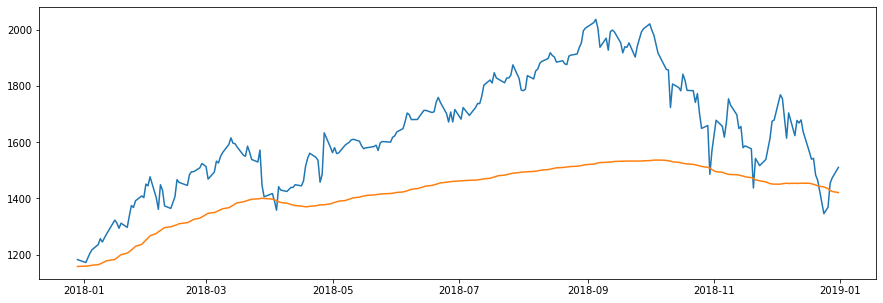

In [71]:
plt.figure(figsize=(15,5))
plt.plot(df.iloc[round(len(df) * 0.8):].index,y_test,label='Actual data')
plt.plot(df.iloc[round(len(df) * 0.8):].index,y_pred,label='Predicted data')

### Conclusion
* By LSTM algorithm, Prediction is good, by maintaing the sequence mannner to predict